# Long Distance Bookings Category

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from geopy import distance

In [3]:
df = pd.read_csv('df_travel_type_1.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   package_id           0 non-null      float64
 1   travel_type_id       1589 non-null   int64  
 2   from_area_id         1501 non-null   float64
 3   to_area_id           1 non-null      float64
 4   from_city_id         1393 non-null   float64
 5   to_city_id           1588 non-null   float64
 6   from_date            1589 non-null   object 
 7   online_booking       1589 non-null   int64  
 8   mobile_site_booking  1589 non-null   int64  
 9   booking_created      1589 non-null   object 
 10  from_lat             1496 non-null   float64
 11  from_long            1496 non-null   float64
 12  to_lat               1 non-null      float64
 13  to_long              1 non-null      float64
 14  Car_Cancellation     1589 non-null   int64  
dtypes: float64(9), int64(4), object(2)
mem

In [5]:
df.isna().sum()

package_id             1589
travel_type_id            0
from_area_id             88
to_area_id             1588
from_city_id            196
to_city_id                1
from_date                 0
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                 93
from_long                93
to_lat                 1588
to_long                1588
Car_Cancellation          0
dtype: int64

## Data Cleaning

In [6]:
df = df.drop(['package_id', 'travel_type_id', 'from_lat', 'from_long', 'to_lat', 'to_long'], axis=1)
df.head()

,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
0,571.0,NaN,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,0
1,1383.0,NaN,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,0
2,515.0,NaN,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,0
3,136.0,NaN,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,0
4,1118.0,NaN,NaN,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,0


In [7]:
df = df.drop(['to_area_id'], axis=1)

In [8]:
df.isna().sum()

from_area_id            88
from_city_id           196
to_city_id               1
from_date                0
online_booking           0
mobile_site_booking      0
booking_created          0
Car_Cancellation         0
dtype: int64

In [9]:
df['from_area_id'].interpolate(method='linear', inplace=True)


In [10]:
df['from_city_id'].interpolate(method='linear', inplace=True)


In [11]:
df['to_city_id'].interpolate(method='linear', inplace=True)


# Data Transformation

## Change the format of date columns from object date format

In [12]:
df['from_date'] = pd.to_datetime(df['from_date'],format='mixed')
df['booking_created'] = pd.to_datetime(df['booking_created'],format='mixed')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   from_area_id         1589 non-null   float64       
 1   from_city_id         1589 non-null   float64       
 2   to_city_id           1589 non-null   float64       
 3   from_date            1589 non-null   datetime64[ns]
 4   online_booking       1589 non-null   int64         
 5   mobile_site_booking  1589 non-null   int64         
 6   booking_created      1589 non-null   datetime64[ns]
 7   Car_Cancellation     1589 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int64(3)
memory usage: 99.4 KB


In [13]:
df['is_weekend'] = df['from_date'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)
df['booking_gap'] = (df['from_date'] - df['booking_created']).dt.days

df.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_weekend,booking_gap
0,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,0,0
1,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,1,10
2,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,1,3
3,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,0
4,1118.0,8.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,1,1


In [14]:
df['trip_day'] = df['from_date'].dt.day_name()
df['booking_created_day'] = df['booking_created'].dt.day_name()
df.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_weekend,booking_gap,trip_day,booking_created_day
0,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,0,0,Tuesday,Tuesday
1,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,1,10,Saturday,Tuesday
2,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,1,3,Saturday,Tuesday
3,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,0,Friday,Thursday
4,1118.0,8.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,1,1,Sunday,Friday


In [15]:
df['trip_month'] = df['from_date'].dt.month_name()
df['booking_created_month'] = df['booking_created'].dt.month_name()
df

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_weekend,booking_gap,trip_day,booking_created_day,trip_month,booking_created_month
0,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,0,0,Tuesday,Tuesday,January,January
1,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,1,10,Saturday,Tuesday,January,January
2,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,1,3,Saturday,Tuesday,January,January
3,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,0,Friday,Thursday,January,January
4,1118.0,8.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,1,1,Sunday,Friday,January,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,393.0,15.0,191.0,2013-11-23 22:00:00,1,0,2013-11-23 17:54:00,0,1,0,Saturday,Saturday,November,November
1585,119.0,15.0,146.0,2013-11-29 14:00:00,1,0,2013-11-23 23:24:00,0,0,5,Friday,Saturday,November,November
1586,1281.0,15.0,32.0,2013-11-24 07:30:00,1,0,2013-11-23 23:44:00,0,1,0,Sunday,Saturday,November,November
1587,393.0,15.0,116.0,2013-11-24 10:30:00,0,0,2013-11-24 07:14:00,0,1,0,Sunday,Sunday,November,November


In [16]:


# Group by 'from_city_id' and calculate the sum of 'Car_Cancellation' for each city
cancellation_summary = df.groupby('from_city_id')['Car_Cancellation'].sum()

# Define classifications
medium_cities = cancellation_summary[(cancellation_summary > 0) & (cancellation_summary <= 10)].index
higher_cities = cancellation_summary[cancellation_summary > 10].index
lowest_cities = cancellation_summary[cancellation_summary == 0].index

# Create a mapping dictionary
city_classification = pd.Series(index=cancellation_summary.index, dtype='object')

city_classification[medium_cities] = 'Medium'
city_classification[higher_cities] = 'Higher'
city_classification[lowest_cities] = 'Lowest'

# Map the new column to the original DataFrame
df['City_Cancellation_Category'] = df['from_city_id'].map(city_classification)

# Display the DataFrame with the new column
df.head()


,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_weekend,booking_gap,trip_day,booking_created_day,trip_month,booking_created_month,City_Cancellation_Category
0,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,0,0,Tuesday,Tuesday,January,January,Higher
1,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,1,10,Saturday,Tuesday,January,January,Higher
2,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,1,3,Saturday,Tuesday,January,January,Higher
3,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,0,Friday,Thursday,January,January,Lowest
4,1118.0,8.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,1,1,Sunday,Friday,January,January,Medium


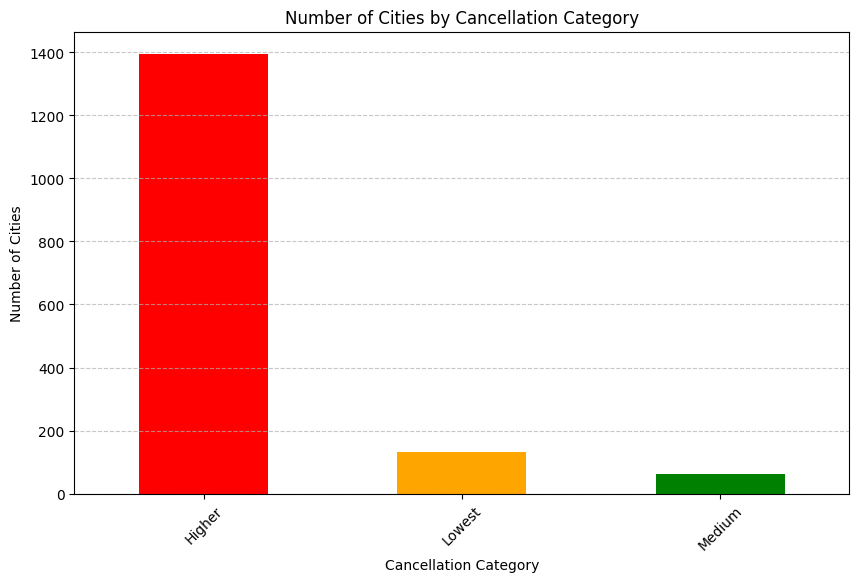

In [17]:
# Count the number of cities in each category
category_counts = df['City_Cancellation_Category'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color=['red', 'orange', 'green'])

plt.title('Number of Cities by Cancellation Category')
plt.xlabel('Cancellation Category')
plt.ylabel('Number of Cities')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

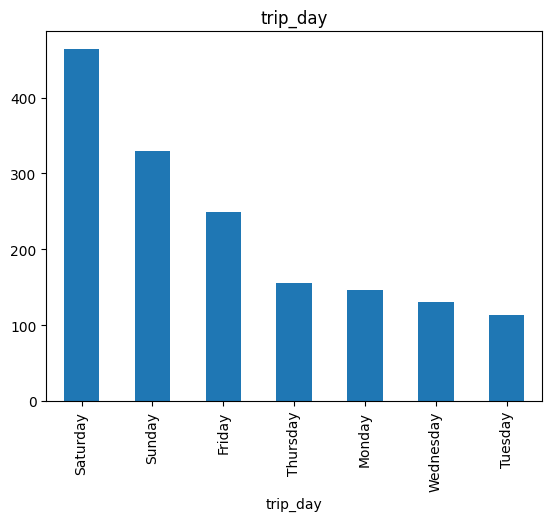

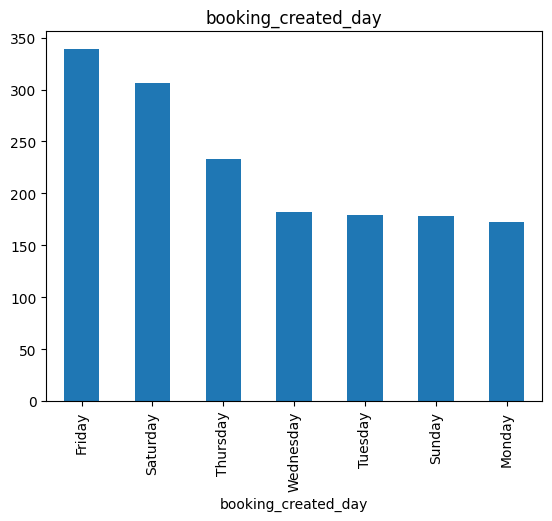

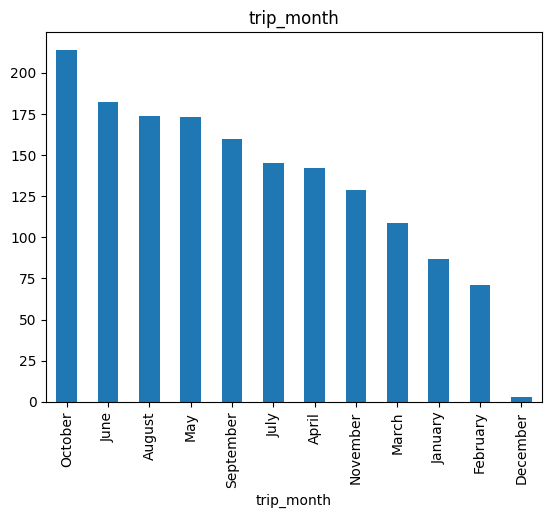

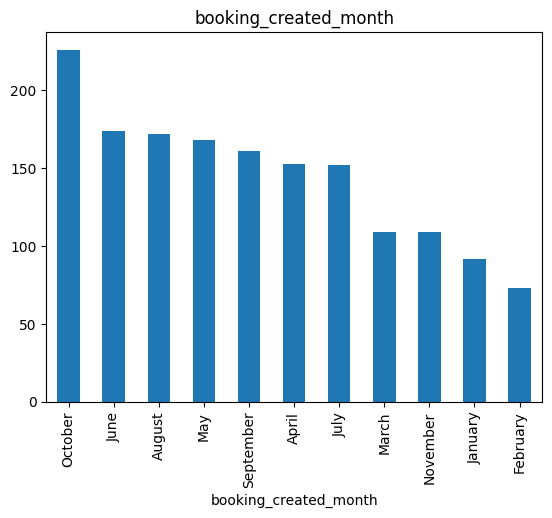

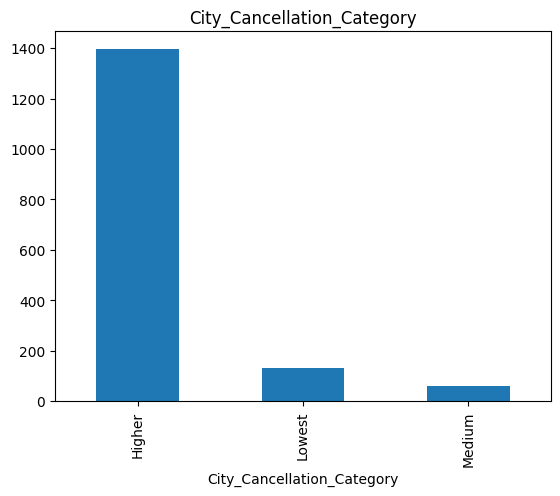

In [18]:
# Visualizing bookings in all categories

for col in df.columns:
  if df[col].dtype == 'object':
    df[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

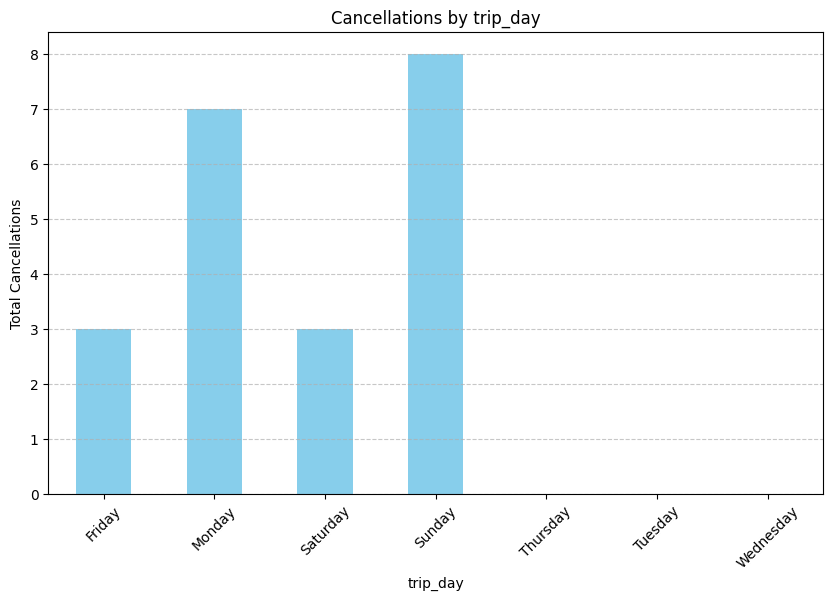

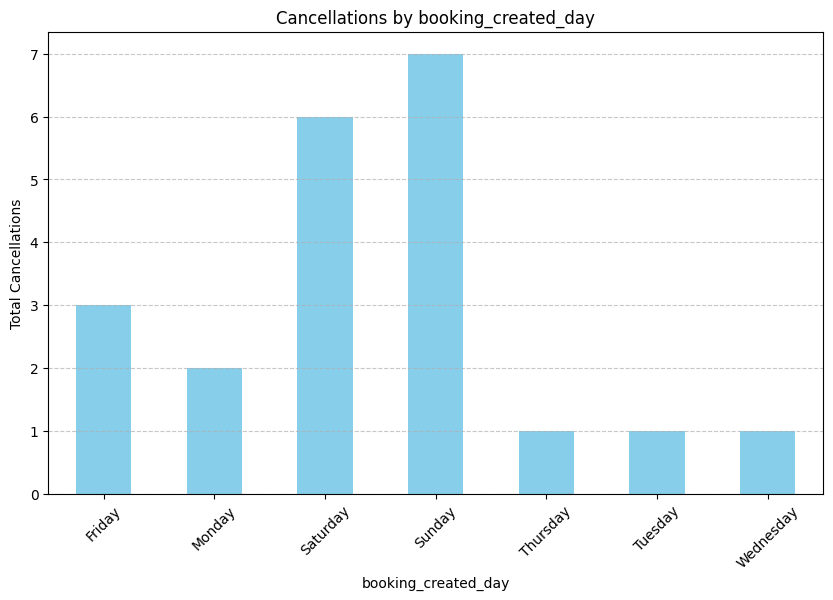

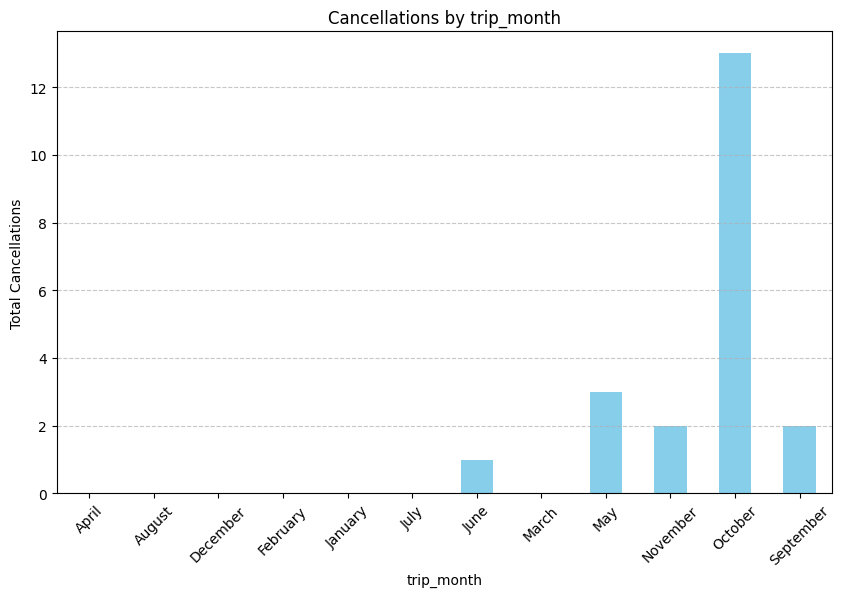

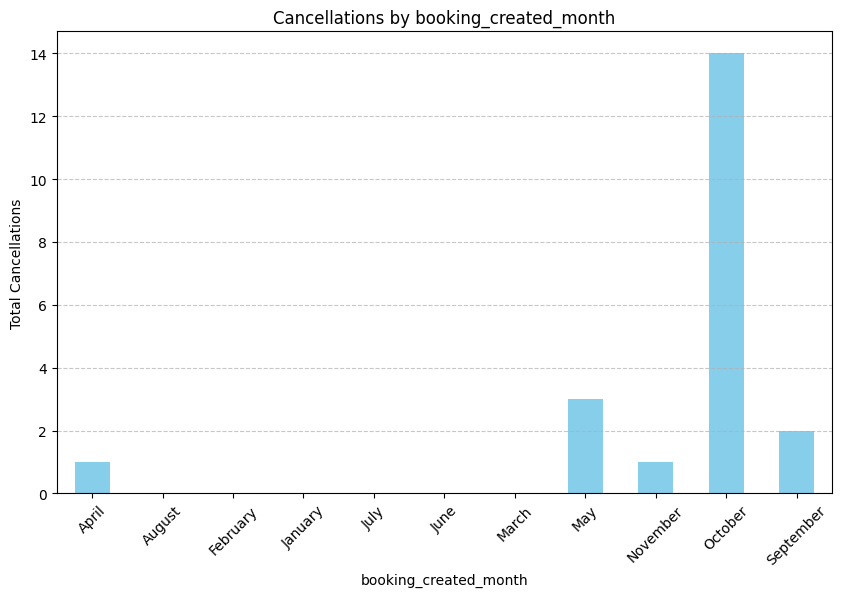

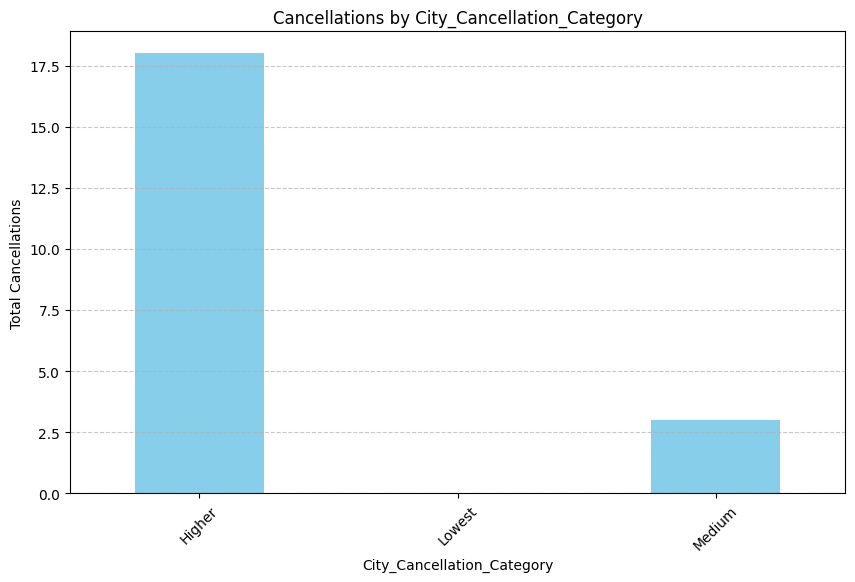

In [19]:
# Visualizing cancellation under all categories

for col in df.columns:
    if df[col].dtype == 'object':
        # Aggregate cancellations by the categorical column
        cancellation_counts = df.groupby(col)['Car_Cancellation'].sum()
        
        # Plotting the bar chart
        plt.figure(figsize=(10, 6))
        cancellation_counts.plot(kind='bar', color='skyblue')
        
        plt.title(f'Cancellations by {col}')
        plt.xlabel(col)
        plt.ylabel('Total Cancellations')
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()


In [20]:
df.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_weekend,booking_gap,trip_day,booking_created_day,trip_month,booking_created_month,City_Cancellation_Category
0,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,0,0,Tuesday,Tuesday,January,January,Higher
1,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,1,10,Saturday,Tuesday,January,January,Higher
2,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,1,3,Saturday,Tuesday,January,January,Higher
3,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,0,Friday,Thursday,January,January,Lowest
4,1118.0,8.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,1,1,Sunday,Friday,January,January,Medium


### Now we need to create a cloumn with the part of the day the trip time is

In [21]:
hour = df['from_date'].dt.hour

# Define conditions for time of day
cond = [
    hour.between(5, 8),   # Early Morning
    hour.between(9, 12),  # Morning
    hour.between(13, 16), # Afternoon
    hour.between(17, 20), # Evening
    (hour.between(21, 23)) | (hour == 0), # Night
    hour.between(1, 4)    # Late Night
]

# Define values corresponding to each condition
values = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']

# Create new column based on conditions
df['time_of_day'] = np.select(cond, values, default='Unknown')

# Display the DataFrame with the new column
df

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_weekend,booking_gap,trip_day,booking_created_day,trip_month,booking_created_month,City_Cancellation_Category,time_of_day
0,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,0,0,Tuesday,Tuesday,January,January,Higher,Morning
1,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,1,10,Saturday,Tuesday,January,January,Higher,Early Morning
2,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,1,3,Saturday,Tuesday,January,January,Higher,Early Morning
3,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,0,Friday,Thursday,January,January,Lowest,Morning
4,1118.0,8.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,1,1,Sunday,Friday,January,January,Medium,Early Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,393.0,15.0,191.0,2013-11-23 22:00:00,1,0,2013-11-23 17:54:00,0,1,0,Saturday,Saturday,November,November,Higher,Night
1585,119.0,15.0,146.0,2013-11-29 14:00:00,1,0,2013-11-23 23:24:00,0,0,5,Friday,Saturday,November,November,Higher,Afternoon
1586,1281.0,15.0,32.0,2013-11-24 07:30:00,1,0,2013-11-23 23:44:00,0,1,0,Sunday,Saturday,November,November,Higher,Early Morning
1587,393.0,15.0,116.0,2013-11-24 10:30:00,0,0,2013-11-24 07:14:00,0,1,0,Sunday,Sunday,November,November,Higher,Morning


In [22]:
df.rename(columns={'time_of_day': 'trip_time_on_the_day'}, inplace=True)

In [23]:
df.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_weekend,booking_gap,trip_day,booking_created_day,trip_month,booking_created_month,City_Cancellation_Category,trip_time_on_the_day
0,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,0,0,Tuesday,Tuesday,January,January,Higher,Morning
1,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,1,10,Saturday,Tuesday,January,January,Higher,Early Morning
2,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,1,3,Saturday,Tuesday,January,January,Higher,Early Morning
3,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,0,Friday,Thursday,January,January,Lowest,Morning
4,1118.0,8.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,1,1,Sunday,Friday,January,January,Medium,Early Morning


### Now we need to create a cloumn with the part of the day the booking is done

In [24]:
hour = df['booking_created'].dt.hour

# Define conditions for time of day
cond = [
    hour.between(5, 8),   # Early Morning
    hour.between(9, 12),  # Morning
    hour.between(13, 16), # Afternoon
    hour.between(17, 20), # Evening
    (hour.between(21, 23)) | (hour == 0), # Night
    hour.between(1, 4)    # Late Night
]

# Define values corresponding to each condition
values = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']

# Create new column based on conditions
df['booking_time_of_day'] = np.select(cond, values, default='Unknown')

# Display the DataFrame with the new column
df.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_weekend,booking_gap,trip_day,booking_created_day,trip_month,booking_created_month,City_Cancellation_Category,trip_time_on_the_day,booking_time_of_day
0,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,0,0,Tuesday,Tuesday,January,January,Higher,Morning,Morning
1,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,1,10,Saturday,Tuesday,January,January,Higher,Early Morning,Morning
2,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,1,3,Saturday,Tuesday,January,January,Higher,Early Morning,Afternoon
3,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,0,Friday,Thursday,January,January,Lowest,Morning,Morning
4,1118.0,8.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,1,1,Sunday,Friday,January,January,Medium,Early Morning,Morning


In [25]:
y = df[['Car_Cancellation']]
y.head()

,Car_Cancellation
0,0
1,0
2,0
3,0
4,0


In [26]:
# Group by 'to_city_id' and calculate the sum of 'Car_Cancellation' for each city
cancellation_summary = df.groupby('to_city_id')['Car_Cancellation'].sum()



In [27]:
higher_cities = cancellation_summary[cancellation_summary > 5]
 
pd.DataFrame(higher_cities)

,Car_Cancellation
to_city_id,
32.0,8


In [28]:
medium_cities = cancellation_summary[(cancellation_summary < 5) & (cancellation_summary > 0)]
pd.DataFrame(medium_cities)


,Car_Cancellation
to_city_id,
29.0,4
51.0,1
56.0,1
69.0,1
108.0,1
113.0,1
131.0,2
146.0,1
191.0,1


In [29]:
lowest_cities = cancellation_summary[cancellation_summary == 0]
pd.DataFrame(lowest_cities) 

,Car_Cancellation
to_city_id,
4.0,0
5.0,0
8.0,0
10.0,0
11.0,0
...,...
196.0,0
197.0,0
198.0,0


In [30]:


# Group by 'from_city_id' and calculate the sum of 'Car_Cancellation' for each city
cancellation_summary = df.groupby('to_city_id')['Car_Cancellation'].sum()

# Define classifications
medium_cities = cancellation_summary[(cancellation_summary < 5) & (cancellation_summary > 0)].index
higher_cities = cancellation_summary[cancellation_summary > 5].index
lowest_cities = cancellation_summary[cancellation_summary == 0].index

# Create a mapping dictionary
city_classification = pd.Series(index=cancellation_summary.index, dtype='object')

city_classification[medium_cities] = 'Medium'
city_classification[higher_cities] = 'Higher'
city_classification[lowest_cities] = 'Lowest'

# Map the new column to the original DataFrame
df['to_City_Cancellation_Category'] = df['to_city_id'].map(city_classification)

# Display the DataFrame with the new column
df.head()


,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_weekend,booking_gap,trip_day,booking_created_day,trip_month,booking_created_month,City_Cancellation_Category,trip_time_on_the_day,booking_time_of_day,to_City_Cancellation_Category
0,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,0,0,Tuesday,Tuesday,January,January,Higher,Morning,Morning,Medium
1,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,1,10,Saturday,Tuesday,January,January,Higher,Early Morning,Morning,Higher
2,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,1,3,Saturday,Tuesday,January,January,Higher,Early Morning,Afternoon,Higher
3,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,0,Friday,Thursday,January,January,Lowest,Morning,Morning,Lowest
4,1118.0,8.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,1,1,Sunday,Friday,January,January,Medium,Early Morning,Morning,Higher


In [31]:
# Group by 'from_city_id' and calculate the sum of 'Car_Cancellation' for each city
cancellation_summary = df.groupby('from_area_id')['Car_Cancellation'].sum()



In [32]:
highest_cities = cancellation_summary[(cancellation_summary > 0)]
pd.DataFrame(medium_cities)


,to_city_id
0,29.0
1,51.0
2,56.0
3,69.0
4,108.0
5,113.0
6,131.0
7,146.0
8,191.0


In [33]:
lowest_cities = cancellation_summary[cancellation_summary == 0]
pd.DataFrame(lowest_cities) 

,Car_Cancellation
from_area_id,
2.0,0
24.0,0
25.0,0
49.0,0
58.0,0
...,...
1394.0,0
1395.0,0
1396.0,0


In [34]:
# Group by 'from_city_id' and calculate the sum of 'Car_Cancellation' for each area
cancellation_summary = df.groupby('from_area_id')['Car_Cancellation'].sum()

# Define classifications
higher_cities = cancellation_summary[(cancellation_summary > 0)].index
lowest_cities = cancellation_summary[cancellation_summary == 0].index

# Create a mapping dictionary
city_classification = pd.Series(index=cancellation_summary.index, dtype='object')


city_classification[higher_cities] = 'Higher'
city_classification[lowest_cities] = 'Lowest'

# Map the new column to the original DataFrame
df['from_area_Cancellation_Category'] = df['from_area_id'].map(city_classification)

# Display the DataFrame with the new column
df.head()


,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,is_weekend,booking_gap,trip_day,booking_created_day,trip_month,booking_created_month,City_Cancellation_Category,trip_time_on_the_day,booking_time_of_day,to_City_Cancellation_Category,from_area_Cancellation_Category
0,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,0,0,Tuesday,Tuesday,January,January,Higher,Morning,Morning,Medium,Higher
1,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,1,10,Saturday,Tuesday,January,January,Higher,Early Morning,Morning,Higher,Lowest
2,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,1,3,Saturday,Tuesday,January,January,Higher,Early Morning,Afternoon,Higher,Lowest
3,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,0,Friday,Thursday,January,January,Lowest,Morning,Morning,Lowest,Lowest
4,1118.0,8.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,1,1,Sunday,Friday,January,January,Medium,Early Morning,Morning,Higher,Lowest


In [35]:
x = df.drop(['Car_Cancellation'],axis=1)
x.head(1)

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,is_weekend,booking_gap,trip_day,booking_created_day,trip_month,booking_created_month,City_Cancellation_Category,trip_time_on_the_day,booking_time_of_day,to_City_Cancellation_Category,from_area_Cancellation_Category
0,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,0,Tuesday,Tuesday,January,January,Higher,Morning,Morning,Medium,Higher


In [36]:
x.shape

(1589, 18)

In [37]:
x.isna().sum()

from_area_id                       0
from_city_id                       0
to_city_id                         0
from_date                          0
online_booking                     0
mobile_site_booking                0
booking_created                    0
is_weekend                         0
booking_gap                        0
trip_day                           0
booking_created_day                0
trip_month                         0
booking_created_month              0
City_Cancellation_Category         0
trip_time_on_the_day               0
booking_time_of_day                0
to_City_Cancellation_Category      0
from_area_Cancellation_Category    0
dtype: int64

## We no longer need the following columns

#### from_area_id
#### from_city_id
#### to_city_id
#### from_date
#### booking_created

In [38]:
x=x.drop(['from_area_id','from_city_id','to_city_id','from_date','booking_created'],axis=1)


In [39]:
x

,online_booking,mobile_site_booking,is_weekend,booking_gap,trip_day,booking_created_day,trip_month,booking_created_month,City_Cancellation_Category,trip_time_on_the_day,booking_time_of_day,to_City_Cancellation_Category,from_area_Cancellation_Category
0,0,0,0,0,Tuesday,Tuesday,January,January,Higher,Morning,Morning,Medium,Higher
1,1,0,1,10,Saturday,Tuesday,January,January,Higher,Early Morning,Morning,Higher,Lowest
2,0,0,1,3,Saturday,Tuesday,January,January,Higher,Early Morning,Afternoon,Higher,Lowest
3,1,0,0,0,Friday,Thursday,January,January,Lowest,Morning,Morning,Lowest,Lowest
4,1,0,1,1,Sunday,Friday,January,January,Medium,Early Morning,Morning,Higher,Lowest
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,1,0,1,0,Saturday,Saturday,November,November,Higher,Night,Evening,Medium,Higher
1585,1,0,0,5,Friday,Saturday,November,November,Higher,Afternoon,Night,Medium,Lowest
1586,1,0,1,0,Sunday,Saturday,November,November,Higher,Early Morning,Night,Higher,Lowest
1587,0,0,1,0,Sunday,Sunday,November,November,Higher,Morning,Early Morning,Lowest,Higher


## Create dummies for all categorical columns

In [40]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   online_booking                   1589 non-null   int64 
 1   mobile_site_booking              1589 non-null   int64 
 2   is_weekend                       1589 non-null   int64 
 3   booking_gap                      1589 non-null   int64 
 4   trip_day                         1589 non-null   object
 5   booking_created_day              1589 non-null   object
 6   trip_month                       1589 non-null   object
 7   booking_created_month            1589 non-null   object
 8   City_Cancellation_Category       1589 non-null   object
 9   trip_time_on_the_day             1589 non-null   object
 10  booking_time_of_day              1589 non-null   object
 11  to_City_Cancellation_Category    1589 non-null   object
 12  from_area_Cancellation_Category  1

## creating dummy variable for all categorical columns

In [41]:
x.head()

,online_booking,mobile_site_booking,is_weekend,booking_gap,trip_day,booking_created_day,trip_month,booking_created_month,City_Cancellation_Category,trip_time_on_the_day,booking_time_of_day,to_City_Cancellation_Category,from_area_Cancellation_Category
0,0,0,0,0,Tuesday,Tuesday,January,January,Higher,Morning,Morning,Medium,Higher
1,1,0,1,10,Saturday,Tuesday,January,January,Higher,Early Morning,Morning,Higher,Lowest
2,0,0,1,3,Saturday,Tuesday,January,January,Higher,Early Morning,Afternoon,Higher,Lowest
3,1,0,0,0,Friday,Thursday,January,January,Lowest,Morning,Morning,Lowest,Lowest
4,1,0,1,1,Sunday,Friday,January,January,Medium,Early Morning,Morning,Higher,Lowest


In [42]:
num_x = x.select_dtypes(include='number')
char_x = x.select_dtypes(include='object')

In [43]:
num_x.head()

,online_booking,mobile_site_booking,is_weekend,booking_gap
0,0,0,0,0
1,1,0,1,10
2,0,0,1,3
3,1,0,0,0
4,1,0,1,1


In [44]:
char_x

,trip_day,booking_created_day,trip_month,booking_created_month,City_Cancellation_Category,trip_time_on_the_day,booking_time_of_day,to_City_Cancellation_Category,from_area_Cancellation_Category
0,Tuesday,Tuesday,January,January,Higher,Morning,Morning,Medium,Higher
1,Saturday,Tuesday,January,January,Higher,Early Morning,Morning,Higher,Lowest
2,Saturday,Tuesday,January,January,Higher,Early Morning,Afternoon,Higher,Lowest
3,Friday,Thursday,January,January,Lowest,Morning,Morning,Lowest,Lowest
4,Sunday,Friday,January,January,Medium,Early Morning,Morning,Higher,Lowest
...,...,...,...,...,...,...,...,...,...
1584,Saturday,Saturday,November,November,Higher,Night,Evening,Medium,Higher
1585,Friday,Saturday,November,November,Higher,Afternoon,Night,Medium,Lowest
1586,Sunday,Saturday,November,November,Higher,Early Morning,Night,Higher,Lowest
1587,Sunday,Sunday,November,November,Higher,Morning,Early Morning,Lowest,Higher


In [45]:
X_char_dum = pd.get_dummies(char_x, drop_first = True).astype('int')
X_char_dum.shape

(1589, 48)

In [46]:
pd.set_option('display.max_columns', None)
X_char_dum.head()

,trip_day_Monday,trip_day_Saturday,trip_day_Sunday,trip_day_Thursday,trip_day_Tuesday,trip_day_Wednesday,booking_created_day_Monday,booking_created_day_Saturday,booking_created_day_Sunday,booking_created_day_Thursday,booking_created_day_Tuesday,booking_created_day_Wednesday,trip_month_August,trip_month_December,trip_month_February,trip_month_January,trip_month_July,trip_month_June,trip_month_March,trip_month_May,trip_month_November,trip_month_October,trip_month_September,booking_created_month_August,booking_created_month_February,booking_created_month_January,booking_created_month_July,booking_created_month_June,booking_created_month_March,booking_created_month_May,booking_created_month_November,booking_created_month_October,booking_created_month_September,City_Cancellation_Category_Lowest,City_Cancellation_Category_Medium,trip_time_on_the_day_Early Morning,trip_time_on_the_day_Evening,trip_time_on_the_day_Late Night,trip_time_on_the_day_Morning,trip_time_on_the_day_Night,booking_time_of_day_Early Morning,booking_time_of_day_Evening,booking_time_of_day_Late Night,booking_time_of_day_Morning,booking_time_of_day_Night,to_City_Cancellation_Category_Lowest,to_City_Cancellation_Category_Medium,from_area_Cancellation_Category_Lowest
0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1


In [47]:
X = pd.concat([num_x,X_char_dum], axis=1)
X

,online_booking,mobile_site_booking,is_weekend,booking_gap,trip_day_Monday,trip_day_Saturday,trip_day_Sunday,trip_day_Thursday,trip_day_Tuesday,trip_day_Wednesday,booking_created_day_Monday,booking_created_day_Saturday,booking_created_day_Sunday,booking_created_day_Thursday,booking_created_day_Tuesday,booking_created_day_Wednesday,trip_month_August,trip_month_December,trip_month_February,trip_month_January,trip_month_July,trip_month_June,trip_month_March,trip_month_May,trip_month_November,trip_month_October,trip_month_September,booking_created_month_August,booking_created_month_February,booking_created_month_January,booking_created_month_July,booking_created_month_June,booking_created_month_March,booking_created_month_May,booking_created_month_November,booking_created_month_October,booking_created_month_September,City_Cancellation_Category_Lowest,City_Cancellation_Category_Medium,trip_time_on_the_day_Early Morning,trip_time_on_the_day_Evening,trip_time_on_the_day_Late Night,trip_time_on_the_day_Morning,trip_time_on_the_day_Night,booking_time_of_day_Early Morning,booking_time_of_day_Evening,booking_time_of_day_Late Night,booking_time_of_day_Morning,booking_time_of_day_Night,to_City_Cancellation_Category_Lowest,to_City_Cancellation_Category_Medium,from_area_Cancellation_Category_Lowest
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,1,0,1,10,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,1,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1
4,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1585,1,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
1586,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1587,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0


In [48]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=101, sampling_strategy = 'minority',n_jobs=-1)
x_res, y_res = smt.fit_resample(X, y)

C:\Users\lenovo\AppData\Local\Programs\Python\Python38\lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.3,random_state=1)

In [50]:
import warnings
warnings.filterwarnings('ignore')

# Model Building

In [73]:
from sklearn.linear_model import LogisticRegression
type_1_lr = LogisticRegression(random_state=4)
lr.fit(X_train,y_train)

LogisticRegression(random_state=4)

In [74]:
from sklearn.tree import DecisionTreeClassifier
type_1_dtc = DecisionTreeClassifier(criterion='gini',random_state=4)

In [75]:
from sklearn.model_selection import GridSearchCV
param_dist = {'criterion': ['gini', 'entropy'],'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250]}
type_1_gscv_dtc = GridSearchCV(dtc, cv=10, param_grid=param_dist, n_jobs=-1)
type_1_gscv_dtc.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=3,
                                              min_samples_split=150,
                                              random_state=4),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 6, 7],
                         'min_samples_split': [50, 100, 150, 200, 250]})

In [76]:
type_1_gscv_dtc.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 50}

In [77]:
type_1_dtc=DecisionTreeClassifier(criterion='entropy',random_state=4,max_depth=7,min_samples_split=50)
type_1_dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=50,
                       random_state=4)

In [78]:
from sklearn.ensemble import RandomForestClassifier
type_1_rfc = RandomForestClassifier(criterion='gini',random_state=4)

In [79]:
param_dist = {'criterion': ['gini', 'entropy'],'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250],'max_features':['auto','sqrt','log2',None]}
type_1_gscv_rfc = GridSearchCV(rfc, cv=10, param_grid=param_dist, n_jobs=-1)
type_1_gscv_rfc.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=3, min_samples_split=50,
                                              n_estimators=1000, oob_score=True,
                                              random_state=4),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [50, 100, 150, 200, 250]})

In [80]:
type_1_gscv_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_split': 50}

In [59]:
type_1_rfc=RandomForestClassifier(criterion='gini',random_state=4,max_depth=3,min_samples_split=50,max_features = 'sqrt')
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_split=50, random_state=4)

# Model evaluation

In [60]:
y_pred_lr=lr.predict(X_test)
y_pred_dtc=dtc.predict(X_test)
y_pred_rfc=rfc.predict(X_test)

In [61]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [62]:
print('Logistic Regression Metrics')
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_lr))
print('Precision:', metrics.precision_score(y_test, y_pred_lr))
print('Recall:', metrics.recall_score(y_test, y_pred_lr))
print('f1_score:', metrics.f1_score(y_test, y_pred_lr))
print('cnf_matrix:\n',confusion_matrix(y_test,y_pred_lr))

Logistic Regression Metrics
Accuracy: 0.9808510638297873
Precision: 0.9609544468546638
Recall: 1.0
f1_score: 0.9800884955752213
cnf_matrix:
 [[479  18]
 [  0 443]]


In [63]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = lr.predict_proba(X_test)[:,1]
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_lr)
roc_auc_dt = auc(fpr_dt,tpr_dt)

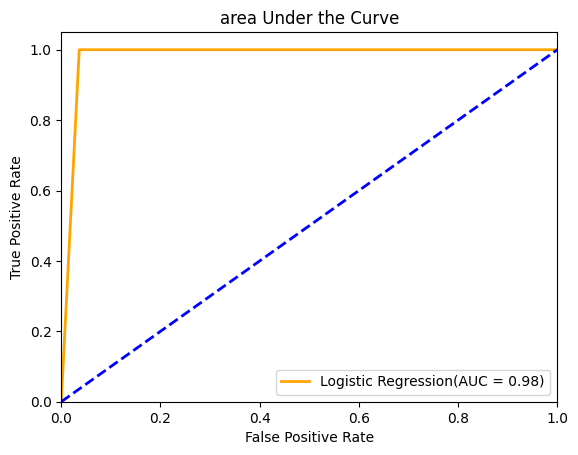

In [64]:
plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Logistic Regression(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

In [65]:
print('Decision Tree Metrics')
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_dtc))
print('Precision:', metrics.precision_score(y_test, y_pred_dtc))
print('Recall:', metrics.recall_score(y_test, y_pred_dtc))
print('f1_score:', metrics.f1_score(y_test, y_pred_dtc))
print('cnf_matrix:\n',confusion_matrix(y_test,y_pred_dtc))

Decision Tree Metrics
Accuracy: 0.8946808510638298
Precision: 0.8173431734317343
Recall: 1.0
f1_score: 0.899492385786802
cnf_matrix:
 [[398  99]
 [  0 443]]


In [66]:
y_pred_prob = dtc.predict_proba(X_test)[:,1]
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_dtc)
roc_auc_dt = auc(fpr_dt,tpr_dt)

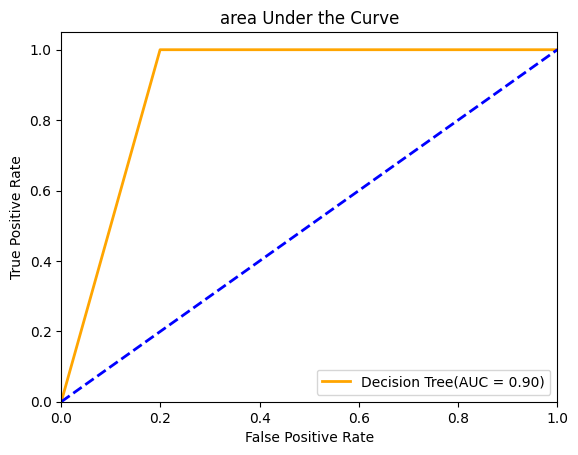

In [67]:
plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

In [68]:
print('Random Forest Metrics')
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_rfc))
print('Precision:', metrics.precision_score(y_test, y_pred_rfc))
print('Recall:', metrics.recall_score(y_test, y_pred_rfc))
print('f1_score:', metrics.f1_score(y_test, y_pred_rfc))
print('cnf_matrix:\n',confusion_matrix(y_test,y_pred_rfc))

Random Forest Metrics
Accuracy: 0.9574468085106383
Precision: 0.9224318658280922
Recall: 0.9932279909706546
f1_score: 0.9565217391304348
cnf_matrix:
 [[460  37]
 [  3 440]]


In [69]:
y_pred_prob = rfc.predict_proba(X_test)[:,1]
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_rfc)
roc_auc_dt = auc(fpr_dt,tpr_dt)

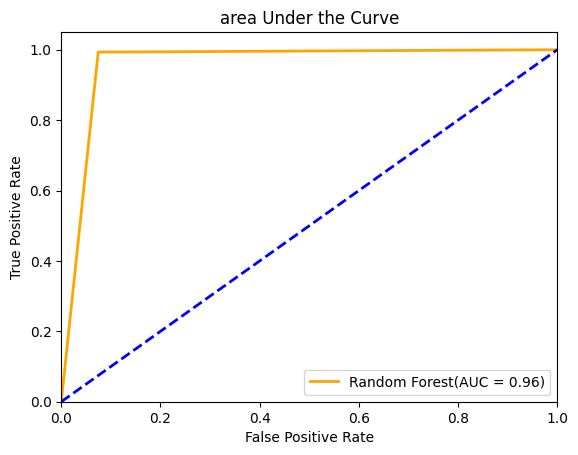

In [70]:
plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Random Forest(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

## OOB rate in random forest model

In [71]:
from tqdm import tqdm
rfc.set_params(warm_start=False, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in tqdm(range(min_estimators, max_estimators + 1), desc="Training Progress"):
    rfc.set_params(n_estimators=i)
    rfc.fit(X_train, y_train)

    oob_error = 1 - rfc.oob_score_
    error_rate[i] = oob_error

Training Progress: 100%|██████████| 986/986 [40:54<00:00,  2.49s/it]


In [72]:
oob_series = pd.Series(error_rate)
min_index = oob_series.idxmin()

min_estimators = oob_series.idxmin()
min_error = oob_series.min()
print(f'minimum estimators = {min_estimators}')
print(f'minimum error = {min_error}')

minimum estimators = 642
minimum error = 0.03193430656934304


Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 Trees)')

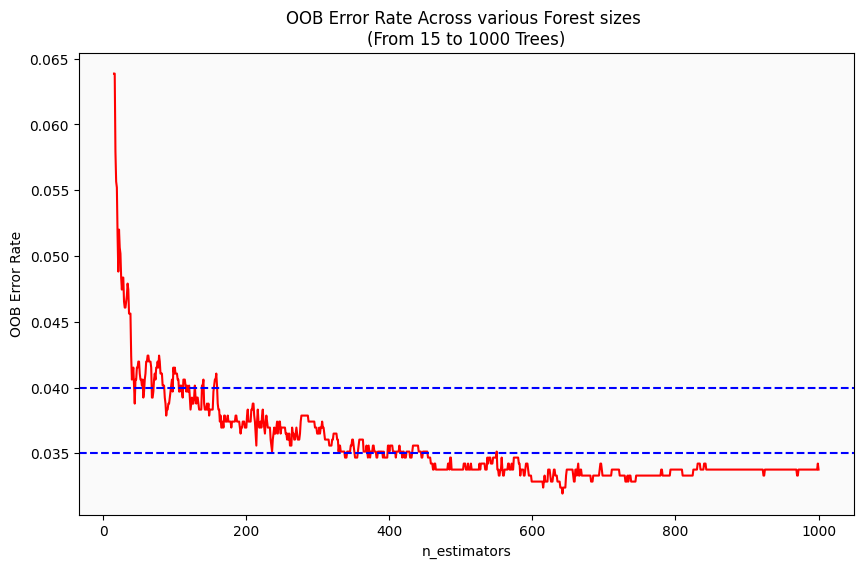

In [82]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.035,color='blue',linestyle='--')
plt.axhline(0.04,color='blue',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 Trees)')

In [83]:
rfc.set_params(criterion='gini',bootstrap = True, max_depth = 3, max_features = None,min_samples_split = 50,oob_score=False,n_estimators =642,warm_start=False,random_state = 4)

RandomForestClassifier(max_depth=3, max_features=None, min_samples_split=50,
                       n_estimators=642, random_state=4)

In [84]:

rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_features=None, min_samples_split=50,
                       n_estimators=642, random_state=4)

In [85]:
y_pred_rfc_oob=rfc.predict(X_test)

## Evaluation

In [86]:
print('Random Forest Metrics')
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_rfc_oob))
print('Precision:', metrics.precision_score(y_test, y_pred_rfc_oob))
print('Recall:', metrics.recall_score(y_test, y_pred_rfc_oob))
print('f1_score:', metrics.f1_score(y_test, y_pred_rfc_oob))
print('cnf_matrix:\n',confusion_matrix(y_test,y_pred_rfc_oob))

Random Forest Metrics
Accuracy: 0.9010638297872341
Precision: 0.8264925373134329
Recall: 1.0
f1_score: 0.9050051072522983
cnf_matrix:
 [[404  93]
 [  0 443]]


# AdA BOOST

In [87]:
from sklearn.ensemble import AdaBoostClassifier

In [88]:
# Initialize the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)


In [89]:
# Initialize the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize the base estimator
base_estimator = DecisionTreeClassifier()

# Initialize the AdaBoost model
ada_boost = AdaBoostClassifier(base_estimator=base_estimator)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of weak learners
    'learning_rate': [0.01, 0.1, 1.0],       # Learning rate
    'base_estimator__max_depth': [1, 2, 3]   # Max depth of the base estimator
}


In [90]:


# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'base_estimator__max_depth': [1, 2, 3],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [91]:
grid_search.best_params_

{'base_estimator__max_depth': 3, 'learning_rate': 1.0, 'n_estimators': 100}

In [ ]:
# Initialize the base estimator
base_estimator = DecisionTreeClassifier(max_depth=3)


In [92]:
# Initialize the AdaBoost classifier
ada_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, learning_rate=1.0, random_state=4)
ada_boost.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=4)

In [93]:
# Make predictions on the test set
y_pred_ada = ada_boost.predict(X_test)


In [94]:
from sklearn.metrics import accuracy_score, classification_report
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_ada)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print a detailed classification report
print(classification_report(y_test, y_pred_ada))


Accuracy: 98.62%
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       497
           1       0.97      1.00      0.99       443

    accuracy                           0.99       940
   macro avg       0.99      0.99      0.99       940
weighted avg       0.99      0.99      0.99       940



In [95]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print('ADA_BOOST')
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_ada))
print('Precision:', metrics.precision_score(y_test, y_pred_ada))
print('Recall:', metrics.recall_score(y_test, y_pred_ada))
print('f1_score:', metrics.f1_score(y_test, y_pred_ada))
print('cnf_matrix:\n',confusion_matrix(y_test,y_pred_ada))

ADA_BOOST
Accuracy: 0.9861702127659574
Precision: 0.973568281938326
Recall: 0.9977426636568849
f1_score: 0.9855072463768115
cnf_matrix:
 [[485  12]
 [  1 442]]


In [96]:
y_pred_prob = ada_boost.predict_proba(X_test)[:,1]
fpr_ada,tpr_ada,_=roc_curve(y_test,y_pred_ada)
roc_auc_ada = auc(fpr_ada,tpr_ada)

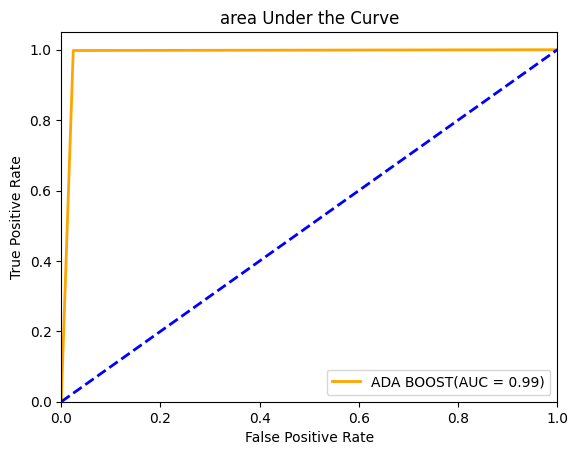

In [97]:
plt.figure(1)
lw=2
plt.plot(fpr_ada,tpr_ada,color='orange',lw=lw,label='ADA BOOST(AUC = %0.2f)'%roc_auc_ada)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

## ADA boost is better than other models but precision and recall are low

In [93]:
x_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 52 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   online_booking                          3132 non-null   int64
 1   mobile_site_booking                     3132 non-null   int64
 2   is_weekend                              3132 non-null   int64
 3   booking_gap                             3132 non-null   int64
 4   trip_day_Monday                         3132 non-null   int32
 5   trip_day_Saturday                       3132 non-null   int32
 6   trip_day_Sunday                         3132 non-null   int32
 7   trip_day_Thursday                       3132 non-null   int32
 8   trip_day_Tuesday                        3132 non-null   int32
 9   trip_day_Wednesday                      3132 non-null   int32
 10  booking_created_day_Monday              3132 non-null   int32
 11  booking_created_d

## random Forest Classifier works best